In [1]:
# Notebook setup
%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import mne
import numpy as np
from cerebra_atlas_python import CerebrA
from cerebra_atlas_python.icbm152_bem import ICBM152BEM
# from cerebra_atlas_python.source_space import get_source_space_mask
from cerebra_atlas_python.utils import (
    lia_to_ras,
    find_closest_point,
    merge_voxel_grids,
    point_cloud_to_voxel,
    move_volume_from_ras_to_lia,
    get_volume_ras,
)

In [3]:
cerebra = CerebrA(source_space_include_non_cortical=True)

In [4]:
# mne.transforms.apply_trans(cerebra.vox_mri_t, cerebra.get_bem_vertices_mri)
bem_pts = mne.transforms.apply_trans(np.linalg.inv(cerebra.vox_mri_t["trans"]), cerebra.get_bem_vertices_mri()).astype(int)

In [5]:
bem_pts[0]

array([[128,  44, 124],
       [ 49,  97, 124],
       [101,  92, 208],
       ...,
       [121, 224, 137],
       [127, 223, 138],
       [126, 225, 132]])

array([[[128,  44, 124],
        [ 49,  97, 124],
        [101,  92, 208],
        ...,
        [121, 224, 137],
        [127, 223, 138],
        [126, 225, 132]],

       [[128,  47, 124],
        [ 52,  98, 124],
        [102,  94, 206],
        ...,
        [120, 221, 136],
        [127, 221, 138],
        [125, 222, 132]],

       [[128,  53, 125],
        [ 57, 100, 125],
        [106,  97, 199],
        ...,
        [127, 201, 131],
        [130, 200, 132],
        [130, 203, 129]]])

ax.get_xlim()=(30.0, 226.0)
fixed_value= 126 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(30.0, 226.0)
fixed_value= 145 cerebra_volume.shape= (256, 256, 256)
ax.get_xlim()=(30.0, 226.0)
fixed_value= 108 cerebra_volume.shape= (256, 256, 256)


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

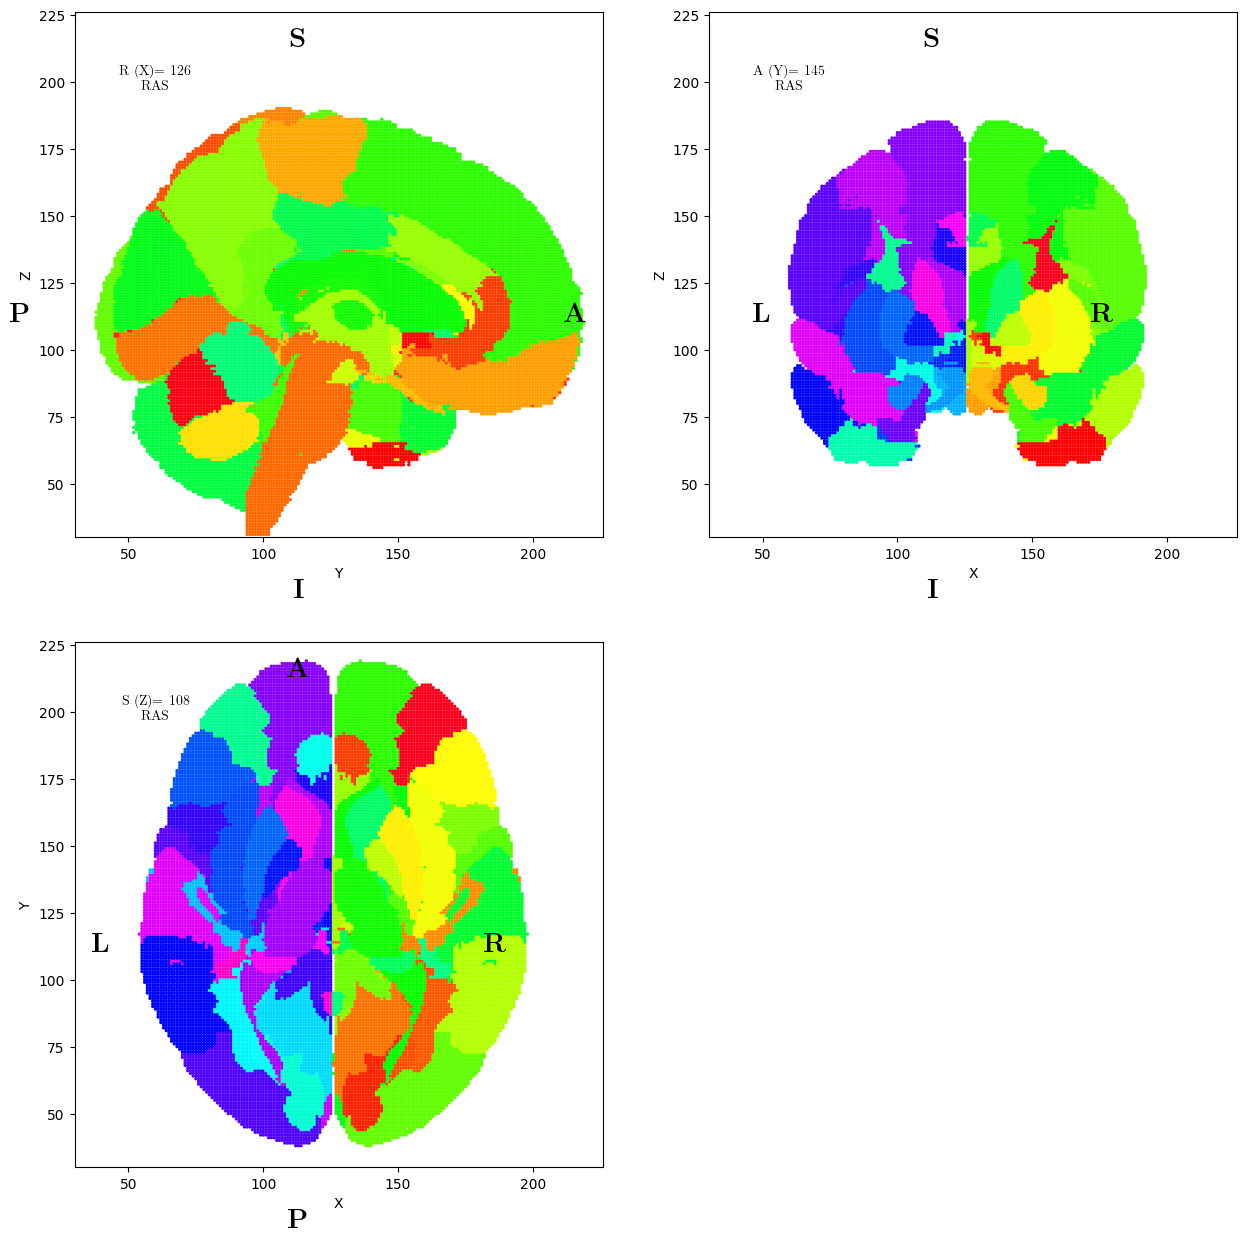

In [6]:
cerebra.orthoview()

In [14]:
src_space_mask_lia = cerebra.get_source_space_mask()

In [15]:
src_space_pts =  np.indices([256, 256, 256])[:, src_space_mask_lia].T

In [7]:
from cerebra_atlas_python.transforms import read_mri_info

In [8]:
vox_ras_t, vox_mri_t, mri_ras_t, dims, zooms = read_mri_info(cerebra._cerebra_img_path)

In [9]:
np.linalg.inv(vox_ras_t["trans"])

array([[-1000. ,    -0. ,    -0. ,   128.5],
       [   -0. ,    -0. , -1000. ,   146.5],
       [    0. ,  1000. ,     0. ,   145.5],
       [    0. ,     0. ,     0. ,     1. ]])

In [10]:
vox_ras_t,vox_mri_t,mri_ras_t

(<Transform | MRI voxel->RAS (non-zero origin)>
 [[-0.001   0.      0.      0.1285]
  [ 0.      0.      0.001  -0.1455]
  [ 0.     -0.001   0.      0.1465]
  [ 0.      0.      0.      1.    ]],
 <Transform | MRI voxel->MRI (surface RAS)>
 [[-0.001  0.     0.     0.128]
  [ 0.     0.     0.001 -0.128]
  [ 0.    -0.001  0.     0.128]
  [ 0.     0.     0.     1.   ]],
 <Transform | MRI (surface RAS)->RAS (non-zero origin)>
 [[ 1.      0.      0.      0.0005]
  [ 0.      1.      0.     -0.0175]
  [ 0.      0.      1.      0.0185]
  [ 0.      0.      0.      1.    ]])

In [16]:
normals = np.repeat([[0, 0, 1]], len(src_space_pts), axis=0)

rr = point_cloud_to_voxel(src_space_pts)
rr = np.argwhere(rr != 0)

print(f"{rr=}")
# inv_aff = np.linalg.inv(mri_rarrs_t["trans"])
rr = mne.transforms.apply_trans(vox_mri_t, rr)
print(f"{rr=}")
# rr = move_volume_from_ras_to_lia(rr)
# rr = np.argwhere(rr != 0)  # Back to point cloud
# inv_aff = np.linalg.inv(self.t1.affine)
# # Translation
# inv_aff[:, 3][2] = 132
# # Rotation
# inv_aff[:, 1][2] *= -1
# inv_aff[:, 2][1] *= -1
# inv_aff[:, 3][1] = -128
# rr = mne.transforms.apply_trans(inv_aff, rr)
# rr = rr / 1000
pos = dict(rr=rr, nn=normals)
src_space = mne.setup_volume_source_space(pos=pos)
rr

rr=array([[ 59, 131, 107],
       [ 59, 131, 110],
       [ 59, 134, 107],
       ...,
       [200, 161, 122],
       [200, 161, 125],
       [200, 161, 128]])
rr=array([[ 0.069, -0.021, -0.003],
       [ 0.069, -0.018, -0.003],
       [ 0.069, -0.021, -0.006],
       ...,
       [-0.072, -0.006, -0.033],
       [-0.072, -0.003, -0.033],
       [-0.072,  0.   , -0.033]])
Sphere                : origin at (0.0 0.0 0.0) mm
              radius  : 95.0 mm
Source location file  : dict()
Assuming input in millimeters
Assuming input in MRI coordinates

Positions (in meters) and orientations
43359 sources


array([[ 0.069, -0.021, -0.003],
       [ 0.069, -0.018, -0.003],
       [ 0.069, -0.021, -0.006],
       ...,
       [-0.072, -0.006, -0.033],
       [-0.072, -0.003, -0.033],
       [-0.072,  0.   , -0.033]])

In [22]:
fiducials[0]

([<DigPoint |        LPA : (-85.1, -0.5, -66.3) mm   : MRI (surface RAS) frame>,
  <DigPoint |     Nasion : (0.0, 104.0, -54.4) mm    : MRI (surface RAS) frame>,
  <DigPoint |        RPA : (83.9, -0.5, -66.3) mm    : MRI (surface RAS) frame>],
 5 (FIFFV_COORD_MRI))

In [31]:
montage = mne.channels.make_standard_montage(
        'GSN-HydroCel-129', head_size=0.1027
    )
info = mne.create_info(montage.ch_names, 100, ch_types=['eeg']*len(montage.ch_names), verbose=0)
info.set_montage(montage)

info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,132 points
Good channels,129 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,100.00 Hz
Highpass,0.00 Hz
Lowpass,50.00 Hz


In [39]:
cerebra.src_space_labels

array([79., 79., 79., ..., 28., 45., 45.])

In [37]:
import os.path as op
identity = mne.transforms.Transform("head","mri",np.eye(4))

fiducials,_ = mne.io.read_fiducials(op.join(icbm.subject_dir, "icbm152-fiducials.fif"))
trans = mne.read_trans(op.join(icbm.subject_dir, "head_mri_t.fif"))

mne.viz.plot_alignment(bem=icbm.bem, trans=trans,src=src_space, mri_fiducials=fiducials,dig=True,info=info)

For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
For automatic theme detection, "darkdetect" has to be installed! You can install it with `pip install darkdetect`
To use light mode, "qdarkstyle" has to be installed! You can install it with:
pip install qdarkstyle

Channel types::	eeg: 129


In [ ]:
icbm.cache_path

'/home/carlos/.cache/cerebra_atlas_python/ICBM152'

In [ ]:
icbm = ICBM152()
icbm.get_bem_vertices_mri()

array([[[-0.00073984, -0.00331891,  0.08369319],
        [ 0.0786732 , -0.00328157,  0.03011615],
        [ 0.02689834,  0.08033116,  0.03537355],
        ...,
        [ 0.00684913,  0.00906104, -0.09696281],
        [ 0.00054144,  0.01090568, -0.09556898],
        [ 0.00199144,  0.00485238, -0.09737741]],

       [[-0.00077556, -0.0036626 ,  0.08058219],
        [ 0.07580853, -0.00367088,  0.02906949],
        [ 0.02562258,  0.07804438,  0.03360669],
        ...,
        [ 0.00714984,  0.00863978, -0.09384262],
        [ 0.00061049,  0.01042724, -0.0930406 ],
        [ 0.00207646,  0.00449387, -0.09415665]],

       [[-0.00065477, -0.00284874,  0.07406144],
        [ 0.07096912, -0.00273138,  0.02775213],
        [ 0.0215941 ,  0.0718903 ,  0.03051878],
        ...,
        [ 0.00038999,  0.00353203, -0.07343938],
        [-0.00292758,  0.00497643, -0.07277512],
        [-0.00216836,  0.00126997, -0.0759113 ]]])